In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv")
df

/tmp/ipykernel_1119/3090915469.py:1: DtypeWarning: Columns (50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv")


,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death")]
top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
17,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,8.117383,1056.0,11970.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
21,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,10.668300,2696.0,12894.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
39,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,18.028250,4790.0,13525.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
43,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,20.528133,7771.0,5755.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
47,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,22.148033,5003.0,5355.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273631,KR_6375996445,Red,anonymous 21,kr,Sion,16.009683,1771.0,11742.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273636,KR_6375996445,Red,anonymous 21,kr,Sion,18.526400,8611.0,5140.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273645,KR_6375996445,Red,anonymous 21,kr,Sion,21.620800,5283.0,9605.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273657,KR_6375996445,Red,anonymous 21,kr,Sion,25.485417,4439.0,5171.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP


In [4]:
print("This dataset contains {} matches in which the top died at least once".format(len(np.unique(top_deaths_df["gameId"]))))

This dataset contains 802 matches in which the top died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(top_deaths_df["summoner"])), top_deaths_df.shape[0]))

17 players died a total of 4573 times


In [6]:
blueSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
blueSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
17,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,8.117383,1056.0,11970.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
21,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,10.668300,2696.0,12894.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
39,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,18.028250,4790.0,13525.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
43,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,20.528133,7771.0,5755.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
47,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,22.148033,5003.0,5355.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273534,KR_6376015376,Blue,anonymous 20,kr,Sion,21.960717,7793.0,1257.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
273539,KR_6376015376,Blue,anonymous 20,kr,Sion,24.205267,1222.0,9164.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
273543,KR_6376015376,Blue,anonymous 20,kr,Sion,25.579383,5441.0,3406.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
273547,KR_6376015376,Blue,anonymous 20,kr,Sion,28.063350,2928.0,2319.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP


In [7]:
print("Blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSide_top_deaths_df["gameId"]))))

Blue side contains 366 matches in which the top died at least once


In [8]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_top_deaths_df["summoner"])), blueSide_top_deaths_df.shape[0]))

17 players died a total of 2148 times on the blue side


In [9]:
redSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Red"]
redSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
78,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,12.202533,1254.0,12224.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
92,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,18.802083,10015.0,2461.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
95,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,20.203050,13421.0,3623.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
102,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,23.640633,9809.0,6153.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
107,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,25.149617,7536.0,7962.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273631,KR_6375996445,Red,anonymous 21,kr,Sion,16.009683,1771.0,11742.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273636,KR_6375996445,Red,anonymous 21,kr,Sion,18.526400,8611.0,5140.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273645,KR_6375996445,Red,anonymous 21,kr,Sion,21.620800,5283.0,9605.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP
273657,KR_6375996445,Red,anonymous 21,kr,Sion,25.485417,4439.0,5171.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,TOP


In [10]:
print("Red side contains {} matches in which the top died at least once".format(len(np.unique(redSide_top_deaths_df["gameId"]))))

Red side contains 441 matches in which the top died at least once


In [11]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_top_deaths_df["summoner"])), redSide_top_deaths_df.shape[0]))

17 players died a total of 2425 times on the red side


---
### Clustering Red Side Junglers

In [12]:
redSide_top_deaths_df = redSide_top_deaths_df[["coordinate_x","coordinate_y","timestamp"]]
redSide_top_deaths_df

,coordinate_x,coordinate_y,timestamp
78,1254.0,12224.0,12.202533
92,10015.0,2461.0,18.802083
95,13421.0,3623.0,20.203050
102,9809.0,6153.0,23.640633
107,7536.0,7962.0,25.149617
...,...,...,...
273631,1771.0,11742.0,16.009683
273636,8611.0,5140.0,18.526400
273645,5283.0,9605.0,21.620800
273657,4439.0,5171.0,25.485417


In [13]:
redSide_top_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 78 to 273671
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  2425 non-null   float64
 1   coordinate_y  2425 non-null   float64
 2   timestamp     2425 non-null   float64
dtypes: float64(3)
memory usage: 75.8 KB


Normalize Data:

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_top_deaths_df)
data_scaled

array([[-1.07915742,  0.66755565, -0.39987215],
       [ 1.33515626, -1.88102738,  0.44499608],
       [ 2.27376514, -1.57769301,  0.62434653],
       ...,
       [ 0.03113476, -0.01612139,  0.80584556],
       [-0.20145064, -1.17359524,  1.30059018],
       [ 1.62423457,  0.92103042,  2.22408772]])

#### K-Means:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


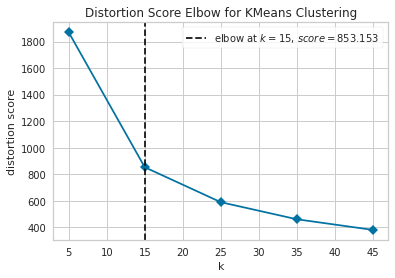

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#150
ks = np.arange(5,50, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=15, random_state=42)

In [17]:
# Add the cluster labels to the original dataframe
redSide_top_deaths_df["cluster"] = kmeans.labels_
redSide_top_deaths_df

/tmp/ipykernel_1119/2946443036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redSide_top_deaths_df["cluster"] = kmeans.labels_


,coordinate_x,coordinate_y,timestamp,cluster
78,1254.0,12224.0,12.202533,11
92,10015.0,2461.0,18.802083,14
95,13421.0,3623.0,20.203050,3
102,9809.0,6153.0,23.640633,7
107,7536.0,7962.0,25.149617,9
...,...,...,...,...
273631,1771.0,11742.0,16.009683,11
273636,8611.0,5140.0,18.526400,9
273645,5283.0,9605.0,21.620800,12
273657,4439.0,5171.0,25.485417,1


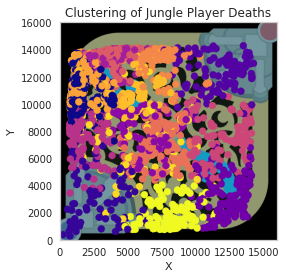

In [18]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(redSide_top_deaths_df['coordinate_x'], redSide_top_deaths_df['coordinate_y'], c=redSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

In [19]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [20]:
# Add the cluster labels to the original dataframe
redSide_top_deaths_df["cluster"] = kmeans.labels_
redSide_top_deaths_df

/tmp/ipykernel_1119/2946443036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redSide_top_deaths_df["cluster"] = kmeans.labels_


,coordinate_x,coordinate_y,timestamp,cluster
78,1254.0,12224.0,12.202533,1
92,10015.0,2461.0,18.802083,3
95,13421.0,3623.0,20.203050,3
102,9809.0,6153.0,23.640633,3
107,7536.0,7962.0,25.149617,0
...,...,...,...,...
273631,1771.0,11742.0,16.009683,1
273636,8611.0,5140.0,18.526400,3
273645,5283.0,9605.0,21.620800,2
273657,4439.0,5171.0,25.485417,2


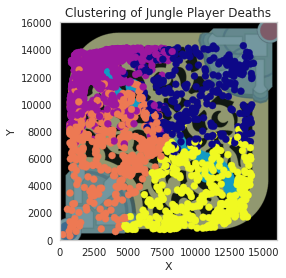

In [21]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(redSide_top_deaths_df['coordinate_x'], redSide_top_deaths_df['coordinate_y'], c=redSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

Cluster 0:


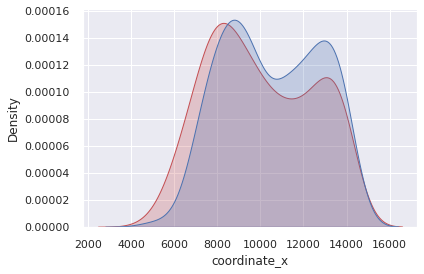

Cluster 1:


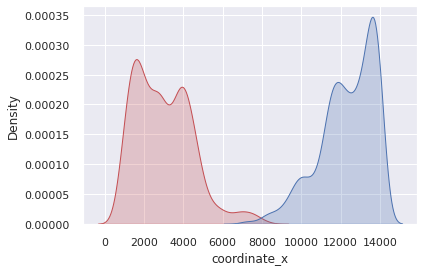

Cluster 2:


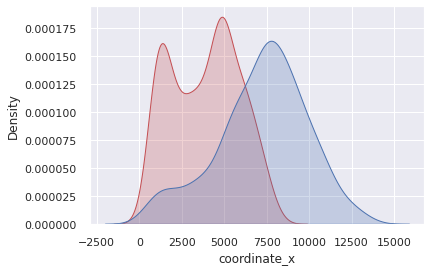

Cluster 3:


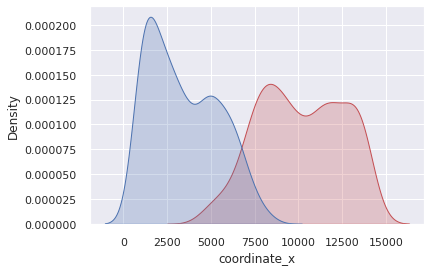

In [22]:
import seaborn as sns

sns.set(style="darkgrid")

for cluster in np.unique(redSide_top_deaths_df["cluster"]):
    print("Cluster {}:".format(cluster))
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["cluster"] == cluster]
    fig = sns.kdeplot(temp_df['coordinate_x'], shade=True, color="r")
    fig = sns.kdeplot(temp_df['coordinate_y'], shade=True, color="b")
    #fig = sns.kdeplot(temp_df['timestamp'], shade=True, color="g")
    plt.show()

Cluster 0:


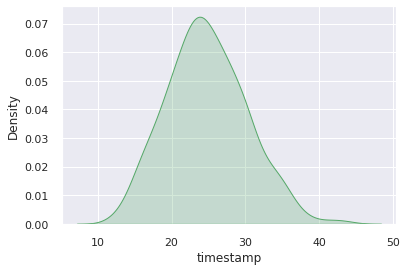

Cluster 1:


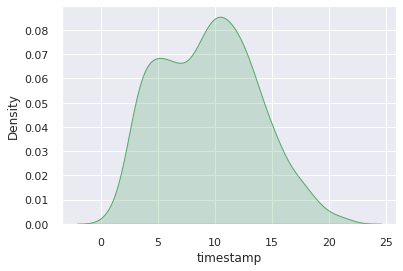

Cluster 2:


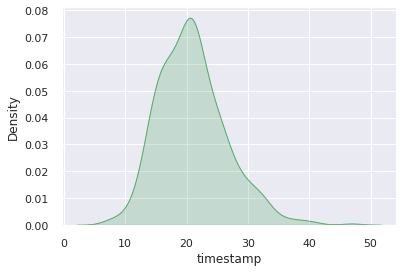

Cluster 3:


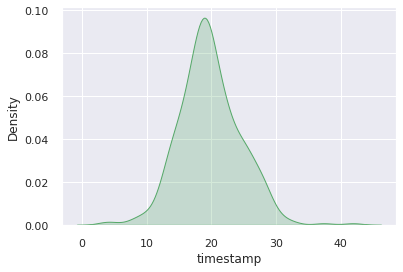

In [23]:
for cluster in np.unique(redSide_top_deaths_df["cluster"]):
    print("Cluster {}:".format(cluster))
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["cluster"] == cluster]
    fig = sns.kdeplot(temp_df['timestamp'], shade=True, color="g")
    plt.show()

#### DBSCAN:

In [24]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

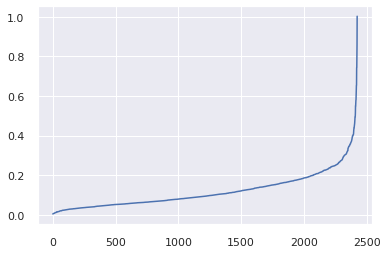

In [25]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [27]:
for eps in [0.19, 0.2,0.25, 0.3,0.35, 0.4]:
    for Nmin in [3, 4, 5,6, 7, 8, 9, 10, 15, 20, 30, 50]:
        db = DBSCAN(eps=eps, min_samples=Nmin).fit(data_scaled)
        nclusts=len(set(db.labels_))
        if nclusts>1:
            #Remember that the first cluster is NOISE!!! [-1]
            print("NMin: %2d Eps: %4.2f NClusters: %2d" %(Nmin, eps, nclusts), "-->", np.bincount(1+ db.labels_))
            print("Silhouette score: {}\n".format(silhouette_score(data_scaled, db.labels_)))

NMin:  3 Eps: 0.19 NClusters: 70 --> [ 574 1239  126   26  155    3    5   16    4    9    8    3    4    7
    4   13    3    5    6    3    4    5   10    5    5    6    4    3
    3    4    5    8    7    8    3    3    3    3    6    3    4    3
    5    3    4    3    3   13    3    4    3    3    3    4    3    3
    3    3    3    7    4    5    3    3    3    4    3    3    3    3]
Silhouette score: -0.20473456499754294

NMin:  4 Eps: 0.19 NClusters: 45 --> [ 748 1214   18   91   66   15   42    8    4    5   49    4    4    6
    6    6    8   10    4    4    6    4    4    7    4    3    5    5
    4    4    7    6    5    2    5    4    4    4    4    5    4    4
    5    4    4]
Silhouette score: -0.23571953382823993

NMin:  5 Eps: 0.19 NClusters: 31 --> [ 904 1157   12   16   58   28   32   26   16   12   45   12    7    8
   10    3    6    5    5    6    6    5    4    5    7    5    5    5
    5    5    5]
Silhouette score: -0.17733859253153686

NMin:  6 Eps: 0.19 NClus

In [188]:
dbscan = DBSCAN(min_samples=10, eps=0.20).fit(data_scaled)
#   1   | 0.30
#   10  | 0.20
#   20  | 0.30

In [189]:
# Add the cluster labels to the original dataframe
redSide_top_deaths_df["cluster"] = dbscan.labels_
redSide_top_deaths_df

/tmp/ipykernel_313/470823025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redSide_jungler_deaths_df["cluster"] = dbscan.labels_


,coordinate_x,coordinate_y,timestamp,cluster
5915,8286.0,7654.0,5.672050,9
5938,10048.0,8002.0,17.020000,-1
5946,6100.0,11267.0,21.701117,-1
5951,9475.0,8919.0,23.496983,-1
5958,11804.0,13243.0,27.062767,-1
...,...,...,...,...
275711,1722.0,9788.0,26.279650,-1
275716,3384.0,11610.0,29.629633,-1
275722,6544.0,14078.0,32.611683,-1
275750,5575.0,8675.0,12.166683,-1


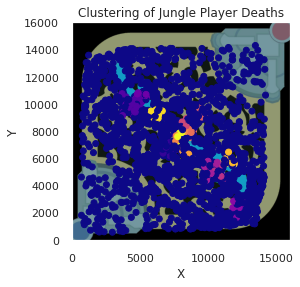

In [190]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(redSide_top_deaths_df['coordinate_x'], redSide_top_deaths_df['coordinate_y'], c=redSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

In [44]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, cmap= "plasma", edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

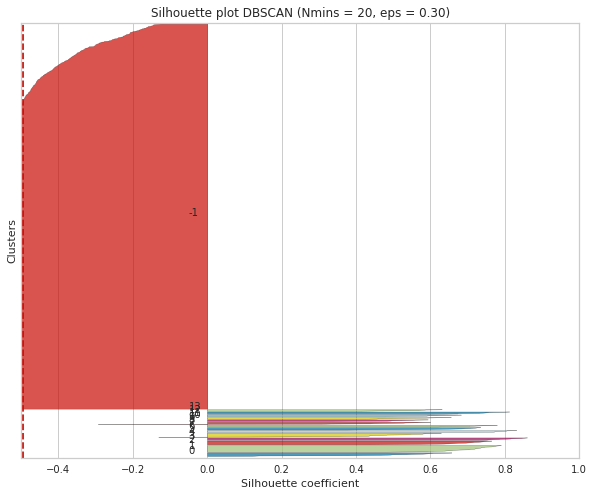

In [12]:
drawSillouette(data_scaled, dbscan.labels_, "DBSCAN (Nmins = 20, eps = 0.30)")

In [17]:
noise_removed_df = redSide_top_deaths_df[redSide_top_deaths_df["cluster"] != -1]
noise_removed_df  

,coordinate_x,coordinate_y,timestamp,cluster
5915,8286.0,7654.0,5.672050,9
5981,11945.0,5778.0,11.490917,11
5989,7147.0,6796.0,15.897583,0
6091,8396.0,8638.0,12.332700,6
6598,5281.0,10441.0,8.899583,1
...,...,...,...,...
275106,10226.0,4895.0,11.223200,4
275131,5433.0,10701.0,22.977533,2
275179,4640.0,9401.0,9.581300,1
275477,11506.0,6453.0,12.480817,11


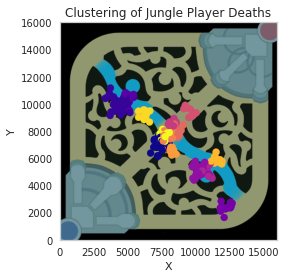

In [14]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(noise_removed_df['coordinate_x'], noise_removed_df['coordinate_y'], c=noise_removed_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

In [18]:
no_noise_data_scaled = scaler.fit_transform(noise_removed_df)
no_noise_data_scaled

array([[ 1.69518221e-01,  2.73417927e-03, -1.45086755e+00,
         9.53453089e-01],
       [ 1.61704190e+00, -8.21687484e-01, -3.82912984e-01,
         1.44519902e+00],
       [-2.81077425e-01, -3.74320078e-01,  4.25856156e-01,
        -1.25940361e+00],
       [ 2.13034921e-01,  4.35160041e-01, -2.28417890e-01,
         2.15834188e-01],
       [-1.01927890e+00,  1.22750133e+00, -8.58508392e-01,
        -1.01353065e+00],
       [-1.63088633e+00,  1.54830507e+00, -7.68225407e-01,
        -1.01353065e+00],
       [ 5.46135478e-01,  9.89315541e-01,  1.83704207e+00,
         4.61707155e-01],
       [-6.54529831e-01,  5.24369848e-01,  5.36777436e-01,
         1.69107199e+00],
       [ 3.74046711e-01, -7.37333580e-03,  8.17261877e-01,
         7.07580122e-01],
       [ 1.03847565e-01, -7.59286554e-02,  1.06802008e+00,
         7.07580122e-01],
       [-2.33209056e-01,  1.28416943e-02, -2.03487979e-01,
        -1.25940361e+00],
       [-2.07684390e-02, -4.41557026e-01, -1.55791934e+00,
      

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.29713098,  0.98804263, -0.7108902 ],
       [-0.21200921, -0.33332131,  0.2771366 ],
       [ 1.44403005, -0.78971697, -0.13670462],
       [ 0.06044955, -0.0031106 , -1.33087729],
       [-1.16612079,  1.1718301 ,  1.40716809],
       [-0.02001319, -0.01012993,  1.3099178 ],
       [ 1.1980552 , -1.10500553, -1.79926811],
       [ 1.7377301 , -2.31398989, -0.28521788],
       [ 0.14606756,  0.25444548, -0.32488747],
       [ 0.11947402, -0.47666965, -1.67386025],
       [ 0.68799992,  0.76936722,  1.82723039],
       [-0.62955012,  0.66653424,  0.56100162],
       [ 0.94084743, -1.14010287, -0.06375307],
       [ 0.33128826,  0.17804097,  1.02260736],
       [-1.62789731,  1.28282411, -0.76356197]])

In [27]:
nclusters = np.unique(noise_removed_df["cluster"])

print("Mean values for each cluster:")
for cluster in nclusters:
    temporary_df = noise_removed_df[noise_removed_df["cluster"] == cluster]
    print("Cluster {}:\n Timestamp: {}\n Coordinates: ({},{})\n".format(cluster,np.mean(temporary_df["timestamp"]), np.mean(temporary_df["coordinate_x"]), np.mean(temporary_df["coordinate_y"])))

Mean values for each cluster:
Cluster 0:
 Timestamp: 9.70389712643678
 Coordinates: (4578.6551724137935,9896.103448275862)

Cluster 1:
 Timestamp: 15.08726862745098
 Coordinates: (7321.588235294118,6889.294117647059)

Cluster 2:
 Timestamp: 12.832409722222222
 Coordinates: (11507.666666666666,5850.75)

Cluster 3:
 Timestamp: 6.325830000000001
 Coordinates: (8010.3,7640.7)

Cluster 4:
 Timestamp: 21.244368181818178
 Coordinates: (4909.818181818182,10314.318181818182)

Cluster 5:
 Timestamp: 20.71448939393939
 Coordinates: (7806.909090909091,7624.727272727273)

Cluster 6:
 Timestamp: 3.7737516666666666
 Coordinates: (10885.9,5133.3)

Cluster 7:
 Timestamp: 12.023219047619047
 Coordinates: (12250.07142857143,2382.214285714286)

Cluster 8:
 Timestamp: 11.807075
 Coordinates: (8226.722222222223,8226.777777777777)

Cluster 9:
 Timestamp: 4.457050000000001
 Coordinates: (8159.5,6563.1)

Cluster 10:
 Timestamp: 23.533123333333332
 Coordinates: (9596.6,9398.5)

Cluster 11:
 Timestamp: 16.633938

---
### Clustering Blue Side Junglers

In [28]:
blueSide_top_deaths_df = blueSide_top_deaths_df[["coordinate_x","coordinate_y","timestamp"]]
blueSide_top_deaths_df

,coordinate_x,coordinate_y,timestamp
17,1056.0,11970.0,8.117383
21,2696.0,12894.0,10.668300
39,4790.0,13525.0,18.028250
43,7771.0,5755.0,20.528133
47,5003.0,5355.0,22.148033
...,...,...,...
273534,7793.0,1257.0,21.960717
273539,1222.0,9164.0,24.205267
273543,5441.0,3406.0,25.579383
273547,2928.0,2319.0,28.063350


In [30]:
blueSide_top_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 6199 to 275395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  1896 non-null   float64
 1   coordinate_y  1896 non-null   float64
 2   timestamp     1896 non-null   float64
dtypes: float64(3)
memory usage: 59.2 KB


Normalize Data:

In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSide_top_deaths_df)
data_scaled

array([[-1.13752694,  0.67674136, -0.93396065],
       [-0.69147206,  0.92278085, -0.62237597],
       [-0.12193613,  1.09080132,  0.27661366],
       ...,
       [ 0.0551259 , -1.60365061,  1.19895561],
       [-0.62837161, -1.89309317,  1.5023626 ],
       [ 0.58957581, -1.84383202,  1.71307897]])

#### K-Means:

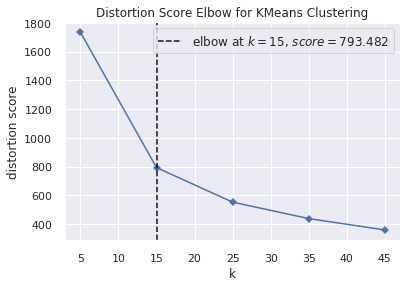

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
#150
ks = np.arange(5,50, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [31]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=15, random_state=42)

In [32]:
# Add the cluster labels to the original dataframe
blueSide_top_deaths_df["cluster"] = kmeans.labels_
blueSide_top_deaths_df

/tmp/ipykernel_1119/3150538912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blueSide_top_deaths_df["cluster"] = kmeans.labels_


,coordinate_x,coordinate_y,timestamp,cluster
17,1056.0,11970.0,8.117383,8
21,2696.0,12894.0,10.668300,0
39,4790.0,13525.0,18.028250,3
43,7771.0,5755.0,20.528133,1
47,5003.0,5355.0,22.148033,11
...,...,...,...,...
273534,7793.0,1257.0,21.960717,11
273539,1222.0,9164.0,24.205267,13
273543,5441.0,3406.0,25.579383,11
273547,2928.0,2319.0,28.063350,6


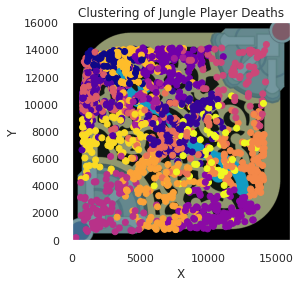

In [33]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(blueSide_top_deaths_df['coordinate_x'], blueSide_top_deaths_df['coordinate_y'], c=blueSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

In [34]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [35]:
# Add the cluster labels to the original dataframe
blueSide_top_deaths_df["cluster"] = kmeans.labels_
blueSide_top_deaths_df

/tmp/ipykernel_1119/3150538912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blueSide_top_deaths_df["cluster"] = kmeans.labels_


,coordinate_x,coordinate_y,timestamp,cluster
17,1056.0,11970.0,8.117383,1
21,2696.0,12894.0,10.668300,1
39,4790.0,13525.0,18.028250,1
43,7771.0,5755.0,20.528133,2
47,5003.0,5355.0,22.148033,0
...,...,...,...,...
273534,7793.0,1257.0,21.960717,2
273539,1222.0,9164.0,24.205267,0
273543,5441.0,3406.0,25.579383,0
273547,2928.0,2319.0,28.063350,0


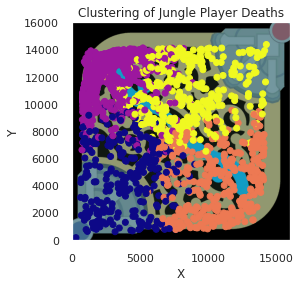

In [36]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(blueSide_top_deaths_df['coordinate_x'], blueSide_top_deaths_df['coordinate_y'], c=blueSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

#### DBSCAN:
Nmin >= dim

if dim > 2 -> Nmin = 2*dim

In [37]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

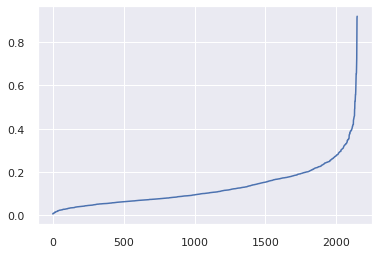

In [38]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [39]:
for eps in [0.2,0.25, 0.3,0.35, 0.4]:
    for Nmin in [3, 4, 5,6, 7, 8, 9, 10, 15, 20, 30, 50]:
        db = DBSCAN(eps=eps, min_samples=Nmin).fit(data_scaled)
        nclusts=len(set(db.labels_))
        if nclusts>1:
            #Remember that the first cluster is NOISE!!! [-1]
            print("NMin: %2d Eps: %4.2f NClusters: %2d" %(Nmin, eps, nclusts), "-->", np.bincount(1+ db.labels_))
            print("Silhouette score: {}\n".format(silhouette_score(data_scaled, db.labels_)))

NMin:  3 Eps: 0.20 NClusters: 85 --> [515 999   9   9  14   8   5   3   3  86  39  25   9   3   7   3  19  20
   3   3   9   4   7  13  22   4   3   6   5   4   5  11  15  12   3  10
   3  12   5   3   3   3   3   3   5   3   5   4  28   4   4   3   6   4
   5   6   4   5   3   4   4  15   4   7   4   4   3   5   3   6   5   4
   3   3   4   4   3   3   3   3   3   3   3   3   3]
Silhouette score: -0.1554147599066919

NMin:  4 Eps: 0.20 NClusters: 58 --> [670 980  12   8   5  81  23   9  22   9  14  19   4   7  22  14  16   6
   4   4   9   9   2   5   9   7  11   5   3   5   4   5   6   4   4  15
  14   7   4   4   9   9   4   6   4   4   4   6   3   4   5   6   4   3
   4   4   4   4]
Silhouette score: -0.19675483610039704

NMin:  5 Eps: 0.20 NClusters: 35 --> [849 969   8  22   7   8  11   9  13   6  20  13  65   6   8   7   7   8
  10   5  12   3  10   7   5   7   4  14   3   6   4   7   6   4   5]
Silhouette score: -0.28120275333891653

NMin:  6 Eps: 0.20 NClusters: 31 --> [956 91

In [40]:
dbscan = DBSCAN(min_samples=7, eps=0.30).fit(data_scaled)

In [41]:
# Add the cluster labels to the original dataframe
blueSide_top_deaths_df["cluster"] = dbscan.labels_
blueSide_top_deaths_df

/tmp/ipykernel_1119/1655638360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blueSide_top_deaths_df["cluster"] = dbscan.labels_


,coordinate_x,coordinate_y,timestamp,cluster
17,1056.0,11970.0,8.117383,0
21,2696.0,12894.0,10.668300,0
39,4790.0,13525.0,18.028250,0
43,7771.0,5755.0,20.528133,0
47,5003.0,5355.0,22.148033,0
...,...,...,...,...
273534,7793.0,1257.0,21.960717,1
273539,1222.0,9164.0,24.205267,-1
273543,5441.0,3406.0,25.579383,3
273547,2928.0,2319.0,28.063350,2


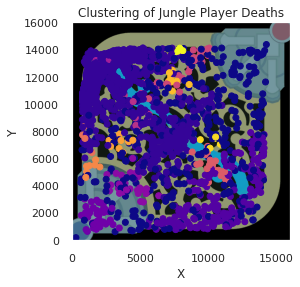

In [42]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(blueSide_top_deaths_df['coordinate_x'], blueSide_top_deaths_df['coordinate_y'], c=blueSide_top_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

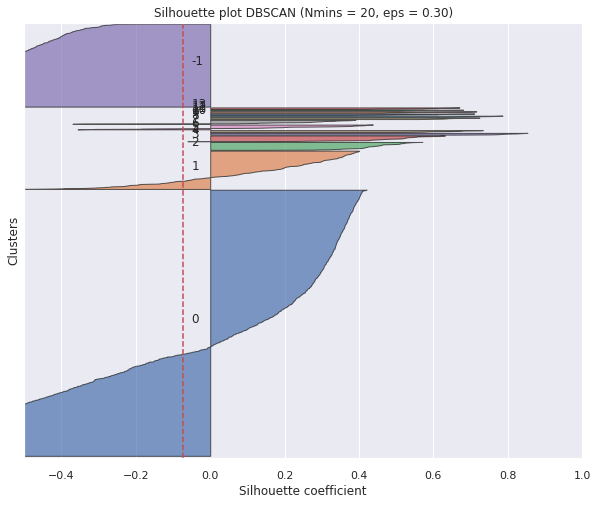

In [45]:
drawSillouette(data_scaled, dbscan.labels_, "DBSCAN (Nmins = 20, eps = 0.30)")

In [46]:
silhouette_score(data_scaled, dbscan.labels_)

-0.07292784536102405

In [47]:
blueSide_top_deaths_df[blueSide_top_deaths_df["cluster"] == -1]


,coordinate_x,coordinate_y,timestamp,cluster
159,989.0,4715.0,25.350600,-1
199,8634.0,11889.0,20.559083,-1
314,9312.0,11310.0,18.559967,-1
360,8702.0,5992.0,16.195300,-1
382,9588.0,9428.0,24.303983,-1
...,...,...,...,...
273348,8151.0,13407.0,33.104833,-1
273350,11289.0,7877.0,34.666017,-1
273506,9461.0,13398.0,9.346883,-1
273539,1222.0,9164.0,24.205267,-1


In [48]:
noise_removed_df = blueSide_top_deaths_df[blueSide_top_deaths_df["cluster"] != -1]
noise_removed_df    

,coordinate_x,coordinate_y,timestamp,cluster
17,1056.0,11970.0,8.117383,0
21,2696.0,12894.0,10.668300,0
39,4790.0,13525.0,18.028250,0
43,7771.0,5755.0,20.528133,0
47,5003.0,5355.0,22.148033,0
...,...,...,...,...
273521,1142.0,8957.0,16.895650,0
273527,6680.0,1554.0,19.016683,1
273534,7793.0,1257.0,21.960717,1
273543,5441.0,3406.0,25.579383,3


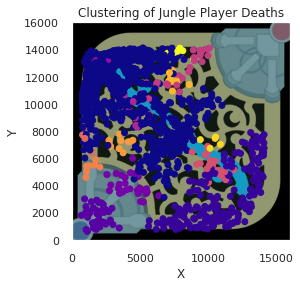

In [49]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(noise_removed_df['coordinate_x'], noise_removed_df['coordinate_y'], c=noise_removed_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

In [50]:
no_noise_data_scaled = scaler.fit_transform(noise_removed_df)
no_noise_data_scaled

array([[-1.05242521,  0.59740924, -0.85825233, -0.34901065],
       [-0.5596147 ,  0.85213169, -0.48915584, -0.34901065],
       [ 0.06962018,  1.02608177,  0.57576791, -0.34901065],
       ...,
       [ 0.97200429, -2.35588264,  1.14476323,  0.14062493],
       [ 0.26524191, -1.76345996,  1.6683543 ,  1.11989608],
       [-0.48990004, -2.06311722,  2.02776368,  0.6302605 ]])

In [51]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.3573375 , -1.23048875,  1.10803438],
       [-0.6710358 ,  0.64227266, -0.76382982],
       [ 1.42456279, -1.32836619,  0.3690203 ],
       [ 0.75496956,  0.38001627,  0.87097161]])

In [52]:
nclusters = np.unique(noise_removed_df["cluster"])

print("Mean values for each cluster:")
for cluster in nclusters:
    temporary_df = noise_removed_df[noise_removed_df["cluster"] == cluster]
    print("Cluster {}:\n Timestamp: {}\n Coordinates: ({},{})\n".format(cluster,np.mean(temporary_df["timestamp"]), np.mean(temporary_df["coordinate_x"]), np.mean(temporary_df["coordinate_y"])))

Mean values for each cluster:
Cluster 0:
 Timestamp: 12.022914961700023
 Coordinates: (3573.830985915493,11138.701260192734)

Cluster 1:
 Timestamp: 18.701394615384615
 Coordinates: (10875.471794871795,3302.4)

Cluster 2:
 Timestamp: 27.360352845528453
 Coordinates: (1867.9268292682927,1749.7073170731708)

Cluster 3:
 Timestamp: 24.83736
 Coordinates: (4222.1,3955.3)

Cluster 4:
 Timestamp: 21.87688
 Coordinates: (2731.3,13293.7)

Cluster 5:
 Timestamp: 28.00316666666666
 Coordinates: (4841.090909090909,9425.0)

Cluster 6:
 Timestamp: 16.802402
 Coordinates: (8080.04,12410.24)

Cluster 7:
 Timestamp: 25.367619047619048
 Coordinates: (10321.57142857143,5458.9047619047615)

Cluster 8:
 Timestamp: 25.570195833333337
 Coordinates: (1032.875,7348.0)

Cluster 9:
 Timestamp: 17.74075714285714
 Coordinates: (1402.0,5316.714285714285)

Cluster 10:
 Timestamp: 22.143216666666667
 Coordinates: (3550.25,7115.875)

Cluster 11:
 Timestamp: 22.222358333333332
 Coordinates: (7488.5,11762.375)

Cluster